# CRISP - Cross Industry Standard Process for Data Mining


## Steps 1 and 2 - Business and Data Understanding

This Jupyter Notebook presents the effort to gather, assess, analize, clean, prepare and model an insurance company data, available at https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction.

According to the source above, the data has information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc. It also  informs whether the customer would be interested in vehicle insurance.

The main objective of this script is to answer the following business questions:

- What is the percentage of interested people in vehicle insurance in our data?
- Is there a specific public that are more interested in vehicle insurance compared to the others?
- Is there a group that is less interested?
- Can we predict if a person can be a potencial client using a machine learning technique?

The main business objective here is to understand who is more likely to acquire a car insurance so the marketing team can spend more energy in this group.

### Importing libraries and data

#### gathering, assessing and analyzing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from IPython.display import Image
 
%matplotlib inline

df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

#### First look at the data

In [2]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


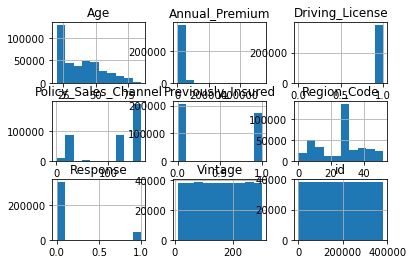

In [4]:
df_train.hist();

In [5]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df_test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


Important to say that in our database, 12% is interested in a car insurance (The "Response" column).

It seems both df_train and df_test are pretty much similar. Only the column "response" is missing in the second one. Since we need a complete df, this df is useless to the purpose of this script.
Thus, since we are going to use only the "df_train", let's change its name:



In [7]:
df = df_train
df = df.drop('id', axis=1) #This column is useless to our purpose
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#### Keep on cheking

In [8]:
df.info() # To get a better understanding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [9]:
df.Gender.value_counts() 

Male      206089
Female    175020
Name: Gender, dtype: int64

 ## Step 3 - Preparing Data
 
 Lets check if there is any missing value
 

In [10]:
df.isnull().sum()


Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Ok, Let's thank everybody involved with the creation of this data. It's 100% filled \o/

## Step 4 - Data Modeling

### modeling and visualizing


How is the male and female distribution? and what's the overall percentage of positive responses in our data?

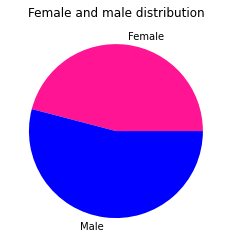

In [11]:
df.groupby(['Gender']).count()['Age'].plot(kind='pie', label='', colors=('deeppink', 'b'))
plt.title('Female and male distribution');

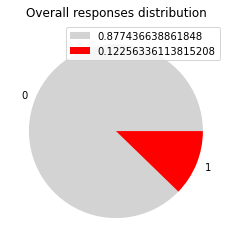

In [75]:
df.groupby(['Response']).count()['Age'].plot(kind='pie', label='', colors=('lightgray', 'red'))
plt.title('Overall responses distribution');

response_t = df.groupby(['Response']).count()['Age'][0]/df.shape[0]
response_f = df.groupby(['Response']).count()['Age'][1]/df.shape[0]

labels = [response_t, response_f]
plt.legend(labels, loc="upper right");
plt.savefig('answer_1.jpg')

Male and female is quite similar.
The overall distribution of positive responses is 12%

Ok, lets put people ages into groups:

In [13]:
age_desc = df["Age"].describe()
age_desc

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [14]:
age_bin_edges = [19 ,age_desc["25%"] , age_desc["50%"] ,age_desc["75%"], 86]
#age_bin_names = ["20-25" ,"25-36" ,"36-49" ,"49-85"] It did not work for machine learing
age_bin_names = ["1" ,"2" ,"3" ,"4"]

df['age_group'] = pd.cut(df['Age'], age_bin_edges, labels=age_bin_names)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_group
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,3
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,4
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,3
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,2


### - Is there a specific public that are more interested in vehicle insurance compared to the others?
Lets check it out!

We are going to see the behavior of the clients in the database according to age and driving licence:

- age:

In [15]:
#Let's create the goups based on ages and their responses:
response_age_group = df.groupby(['age_group', 'Response']).count()['Age']
response_age_group

age_group  Response
1          0           110458
           1             4047
2          0            68023
           1             9350
3          0            74272
           1            20152
4          0            81646
           1            13161
Name: Age, dtype: int64

In [16]:
response_age_group_t = [response_age_group[1] / (response_age_group[1] + response_age_group[0]),
                        response_age_group[3] / (response_age_group[3] + response_age_group[2]),
                        response_age_group[5] / (response_age_group[5] + response_age_group[4]),
                        response_age_group[7] / (response_age_group[7] + response_age_group[6])]

response_age_group_f = [response_age_group[0] / (response_age_group[1] + response_age_group[0]),
                        response_age_group[2] / (response_age_group[3] + response_age_group[2]),
                        response_age_group[4] / (response_age_group[5] + response_age_group[4]),
                        response_age_group[6] / (response_age_group[7] + response_age_group[6])]

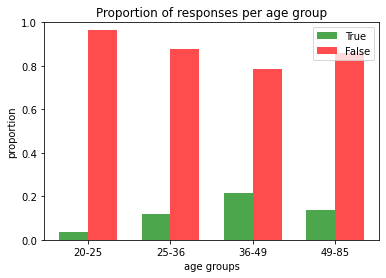

In [17]:
#Now let's see the results:

ind = np.arange(len(response_age_group_f))
width = 0.35      

response_age_group_t_bars = plt.bar(ind, response_age_group_t, width, color='g', alpha=.7, label='True')
response_age_group_f_bars = plt.bar(ind + width, response_age_group_f, width, color='r', alpha=.7, label='False')

plt.ylabel('proportion')
plt.ylim((0,1))
plt.xlabel('age groups')
plt.title('Proportion of responses per age group')
locations = ind + width / 2  
labels = ["20-25" ,"25-36" ,"36-49" ,"49-85"] 
plt.xticks(locations, labels);
plt.legend(loc="best");

In [18]:
response_age_group[5] / (response_age_group[5] + response_age_group[4])

0.21342031686859272

The age group with the higher percentage of positive responses is 36-49 yo: 21%.

- driving licence:

In [19]:
#Let's create the goups based on driver's licence and their responses:
driving_licence_group = df.groupby(['Driving_License', 'Response']).count()['Age']
driving_licence_group

Driving_License  Response
0                0              771
                 1               41
1                0           333628
                 1            46669
Name: Age, dtype: int64

In [20]:
response_driv_lic_t = [driving_licence_group[0][1] / (driving_licence_group[0][0] + driving_licence_group[0][1]),
                       driving_licence_group[1][1] / (driving_licence_group[1][0] + driving_licence_group[1][1])]

response_driv_lic_f = [driving_licence_group[0][0] / (driving_licence_group[0][0] + driving_licence_group[0][1]),
                       driving_licence_group[1][0] / (driving_licence_group[1][0] + driving_licence_group[1][1])]

In [21]:
print(response_driv_lic_t)
print(response_driv_lic_f)

[0.050492610837438424, 0.12271724467981604]
[0.9495073891625616, 0.877282755320184]


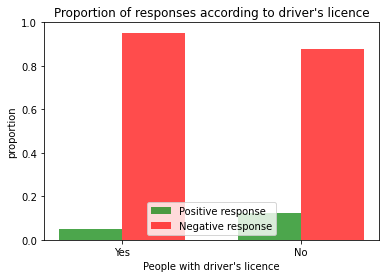

In [22]:
ind = np.arange(len(response_driv_lic_f))
width = 0.35      

response_driv_lic_t_bars = plt.bar(ind, response_driv_lic_t, width, color='g', alpha=.7, label='Positive response')
response_driv_lic_f_bars = plt.bar(ind + width, response_driv_lic_f, width, color='r', alpha=.7, label='Negative response')

plt.ylabel('proportion')
plt.ylim((0,1))
plt.xlabel('People with driver\'s licence')
plt.title('Proportion of responses according to driver\'s licence');
locations = ind + width / 2  
labels = ["Yes" ,"No"] 
plt.xticks(locations, labels);
plt.legend(loc="lower center");

Ok, it seems that between the age groups and having or not the driver's licence, the group of people from 36 to 49 has more interest in having vehicle insurance (21%) in comparison to all other groups analyzed.

- Let's talk about customers



In [23]:
previously_insured_group = df.groupby(['Previously_Insured', 'Response']).count()['Age']
previously_insured_group

Previously_Insured  Response
0                   0           159929
                    1            46552
1                   0           174470
                    1              158
Name: Age, dtype: int64

In [24]:
previously_insured_group[1][1] / previously_insured_group[1].sum()

0.0009047804475799987

In [25]:
prev_ins_response_t = [previously_insured_group[0][1] / previously_insured_group[0].sum(),
                       previously_insured_group[1][1] / previously_insured_group[1].sum()]

prev_ins_response_f = [previously_insured_group[0][0] / previously_insured_group[0].sum(),
                       previously_insured_group[1][0] / previously_insured_group[1].sum()]

In [26]:
print(prev_ins_response_t)
print(prev_ins_response_f)

[0.22545415800969582, 0.0009047804475799987]
[0.7745458419903042, 0.99909521955242]


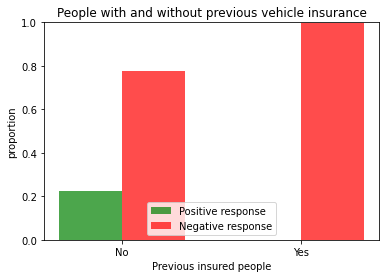

In [27]:
ind = np.arange(len(prev_ins_response_t))
width = 0.35      

prev_insurance_t_bars = plt.bar(ind, prev_ins_response_t, width, color='g', alpha=.7, label='Positive response')
prev_insurance_f_bars = plt.bar(ind + width, prev_ins_response_f, width, color='r', alpha=.7, label='Negative response')

plt.ylabel('proportion')
plt.ylim((0,1))
plt.xlabel('Previous insured people')
plt.title('People with and without previous vehicle insurance');
locations = ind + width / 2  
labels = ["No" ,"Yes"] 
plt.xticks(locations, labels);
plt.legend(loc="lower center");
plt.savefig('answer_3.jpg');

Well, this graph indicates that almost 100% of people who already have a previous vehicle insurance are not interested in a new one. On the other hand, 22% of old clients keep their interest.

Since we have this group of 22% positive answers and that specific age group (36 - 49 yo) with similar percentage. Let's join then and compare to the other in our data:



In [28]:
#grouping by previously insured, then by age group and finally by response:
prev_insured_and_age_group = df.groupby(['Previously_Insured', 'age_group', 'Response']).count()['Age']
prev_insured_and_age_group

Previously_Insured  age_group  Response
0                   1          0           37168
                               1            4002
                    2          0           24004
                               1            9312
                    3          0           48308
                               1           20092
                    4          0           50449
                               1           13146
1                   1          0           73290
                               1              45
                    2          0           44019
                               1              38
                    3          0           25964
                               1              60
                    4          0           31197
                               1              15
Name: Age, dtype: int64

In [29]:
# We only want the non previously insured:
prev_insured_0 = prev_insured_and_age_group[0]
prev_insured_0

age_group  Response
1          0           37168
           1            4002
2          0           24004
           1            9312
3          0           48308
           1           20092
4          0           50449
           1           13146
Name: Age, dtype: int64

In [30]:
# Lets check the percentage of each age group:
age_group_1 = prev_insured_0[1] / (prev_insured_0[0] + prev_insured_0[1])
age_group_2 = prev_insured_0[3] / (prev_insured_0[2] + prev_insured_0[3])
age_group_3 = prev_insured_0[5] / (prev_insured_0[4] + prev_insured_0[5])
age_group_4 = prev_insured_0[7] / (prev_insured_0[6] + prev_insured_0[7])


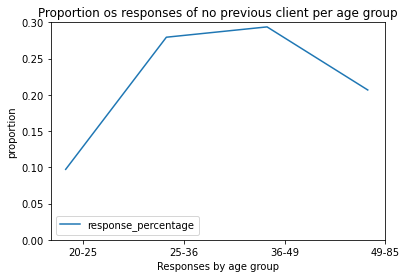

In [31]:
# Create a list of the percentages according to the age groups
age_groups_percentage = [age_group_1,
                         age_group_2,
                         age_group_3,
                         age_group_4]

#Transform the list in DataFrame
df_age_groups_percentage = DataFrame (age_groups_percentage,columns=['response_percentage']);

#Plot the results!
df_age_groups_percentage.plot()
   
ind = np.arange(len(age_groups_percentage))
width = 0.35     
    
plt.ylabel('proportion')
plt.ylim((0,.3))
plt.xlabel('Responses by age group')
plt.title('Proportion os responses of no previous client per age group');
locations = ind + width / 2  
labels = ["20-25" ,"25-36" ,"36-49" ,"49-85"] 
plt.xticks(locations, labels);
plt.legend(loc=None);

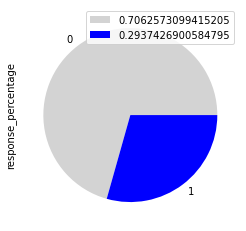

In [76]:
#Let's present only the higher percentage: group 3
revised_plot = [1-age_group_3, age_group_3]

#Transform the list in DataFrame
df_revised_plot = DataFrame(revised_plot,columns=['response_percentage']);

#Plot the results!
df_revised_plot.plot(kind='pie', label='', colors=('lightgray', 'blue'), subplots=True)
#response_t = df.groupby(['Response']).count()['Age'][0]/df.shape[0]
#response_f = df.groupby(['Response']).count()['Age'][1]/df.shape[0]

labels = [(1-age_group_3), age_group_3]
plt.legend(labels, loc="best");
plt.savefig('answer_2.jpg')

That's it! this specifc group: people without vehicle insurange at the age between 36-49 yo has almost 30% of chance to respond positively. Is more than 2 times the overall dataset percentage: 12%.

### Linear Regression

We are going to model this data considering only the numerical features without normalizing or creating adicional columns. We intend to do it a second time and we hope our models gets better after this.

In [32]:
#Drop categorical variables
df_cat = df[['Age',
             'Driving_License',
             'Region_Code',
             'Previously_Insured',
             'Annual_Premium',
             'Policy_Sales_Channel',
             'Vintage',
             'Response']]

#Split into explanatory and response variables
X = df_cat.drop('Response', axis=1)
y = df_cat['Response']

In [33]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [34]:
#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True)

#Fit
lm_model.fit(X_train, y_train) 

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [35]:
print("The r2 of the train: {}".format(train_score))

The r2 of the train: 0.12088442457352366


In [36]:
print("The r2 of the test: {}".format(test_score))

The r2 of the test: 0.12281290174888237



This results are pretty similar, which indicates no overfitting. But lets include the other variables and try to make it better.

Let's create a function called "create_dummy_df":

In [37]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [38]:
#Pull a list of the column names of the categorical variables
cat_df = df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

df_v2 = create_dummy_df(df, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show shape to assure it has the shape expected
print(df_v2.shape)

df_v2.head()

(381109, 13)


,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_group,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,3,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,4,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,3,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,2,0,1,0,0


In [39]:
df_v2.isnull().sum()

Age                      0
Driving_License          0
Region_Code              0
Previously_Insured       0
Annual_Premium           0
Policy_Sales_Channel     0
Vintage                  0
Response                 0
age_group                0
Gender_Male              0
Vehicle_Age_< 1 Year     0
Vehicle_Age_> 2 Years    0
Vehicle_Damage_Yes       0
dtype: int64

Great! Now let's fit our model! This time normalized!

In [40]:
#Split into explanatory and response variables
X_2 = df_v2.drop('Response', axis=1)
y_2 = df_v2['Response']

#Split into train and test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True)

#Fit
lm_model.fit(X_train_2, y_train_2) 

#Predict using your model
y_test_preds_2 = lm_model.predict(X_test_2)
y_train_preds_2 = lm_model.predict(X_train_2)

#Score using your model
test_score_2 = r2_score(y_test_2, y_test_preds_2)
train_score_2 = r2_score(y_train_2, y_train_preds_2)

In [41]:
print("The r2 of the train: {}".format(train_score_2))

The r2 of the train: 0.14762775558713792


In [42]:
print("The r2 of the test: {}".format(test_score_2))

The r2 of the test: 0.1514571870068474


Well, our model did perform better after we normalized and created the dummy columns. But according do r2, our regression explains only 15% of the responses.

## Step 5 - Evaluation

#### What is the percentage of interested people in vehicle insurance in our data?

<font color='blue'>Without agrupments, our data has 12% of positive responses:</font>

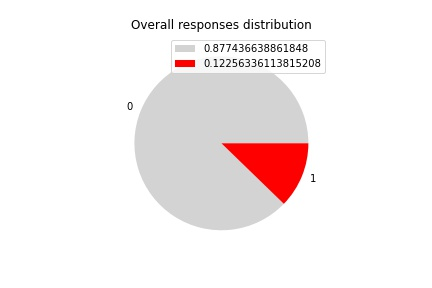

In [77]:
Image(filename='answer_1.jpg')




#### Is there a specific public that are more interested in vehicle insurance compared to the others?


<font color='blue'>Yes. People without vehicle insurange at the age between 36-49 yo has almost 30% of chance to respond positively. Is more than 2 times the overall dataset percentage: 12%. So, if the marketing team want to spend more energy and effort to a specific group of people, it should be this one:</font>


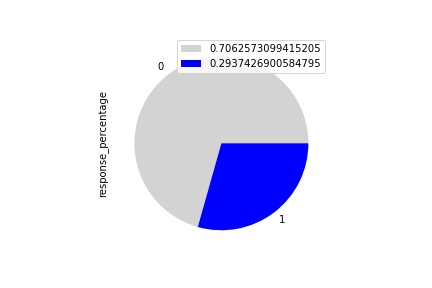

In [78]:
Image(filename='answer_2.jpg')



#### Is there a group that is less interested?


<font color='blue'>Yes. Those people who already have a vehicle insurance:</font>

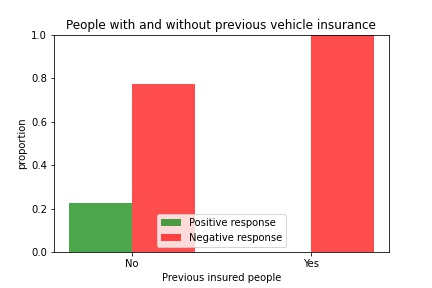

In [45]:
Image(filename='answer_3.jpg')






#### Can we predict if a person can be a potencial client using a machine learning technique?


<font color='blue'> Yes. Using Linear Regression we created a algorithm that resulted in a r2 = 0.15. Since this number is not even close to a desirable answer, this model cleary needs to be improved.
</font>